# LSE CA C2: Class 6

### Assignment template discussion
You should have seen some changes in the format of the assignment for the final week and we can also discuss the final project where the team has been hard at work to make changes to clear up the expectations and uncertainties.

#### Assignment questions
1. Will we be marked down for comments being in seperate cell blocks?? (I wouldn't normally do but in the template it helps keep clean).
2. Are we expected to comment every cell? Or can main comment above and then do cells?
3. The numbers don't make real world sense - are we to pretend like they are real (even if the numbers don't correlate with the population) or are we to comment as if they are false?
4. The report - it's to be written in the markdowns in the Notebook and pdf? or either?
5. When changing the dataframe after joining the covid and the vac data - are we expected to keep as one dataframe or split into regions?

### Other questions
- twitter.yaml
- environments and loading sql

![](https://github.com/apvoges/lse-ca/blob/main/sql_python.png?raw=true)




In [1]:
import numpy as np
import pandas as pd
df = pd.DataFrame(['myvar/n'],columns=["str"])
df
# Note that I did not assign the changes back to the table
# Make sure to persist the changes after testing that your function works as expected

,str
0,myvar/n


In [2]:
df["str"].replace(r"/n","",regex=True)

0    myvar
Name: str, dtype: object

In [3]:
df["str"].replace("/n","",regex=True)

0    myvar
Name: str, dtype: object

### Week 6: Business forecasting

This week we will discuss business forecasting (predictive modelling and forecasting) in preparation for course 3. (Classical statistics, data science)

> ***Additional reading material:*** [What’s the difference between analytics and statistics?](https://www.kdnuggets.com/2019/09/difference-analytics-statistics.html)
> Statistics and analytics are two branches of data science that share many of their early heroes, so the occasional beer is still dedicated to a lively debate about where to draw the boundary between them. Practically, however, modern training programs bearing those names emphasize completely different pursuits. While analysts specialize in exploring what’s in your data, statisticians focus more on inferring what’s beyond it.

![](https://github.com/apvoges/lse-ca/blob/main/forecasting.png?raw=true)

***Predictive modelling:*** Utilises artificial intelligence (AI) and machine learning (ML) algorithms like data mining and probability to forecast or estimate more granular and specific outcomes. Predictive modelling extracts information from data sets and indicates what might happen in the future. 

***Forecasting:*** Estimating/predicting future events/trends based on historic and current (present) data by incorporating time series and analysing trends. As forecast is a subcategory of predictive modelling, it needs to include defendable logic. In essence, no guessing!

Elements of business forecasting
- Why it's important to choose a problem based on business requirements. 
- When to identify the relevant variables that need to be considered in any forecast.
- What to do when there are major variations, contradictions, or new variables in a forecast. 


> ***Additional reading material (After the assignment):***

> [50 Years of Data Science](https://www.tandfonline.com/doi/full/10.1080/10618600.2017.1384734)

> [Data science vs statistics: Two cultures](https://par.nsf.gov/servlets/purl/10100724)

> [Which machine learning algorithm should I use?](https://blogs.sas.com/content/subconsciousmusings/2020/12/09/machine-learning-algorithm-use/)

> [Medium: Cheat sheets of ML and Python](https://medium.com/machine-learning-in-practice/cheat-sheet-of-machine-learning-and-python-and-math-cheat-sheets-a4afe4e791b6)

In [4]:
# 6.1.6
# Import libraries.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

from sklearn.metrics import r2_score, median_absolute_error, mean_absolute_error
from sklearn.metrics import median_absolute_error, mean_squared_error, mean_squared_log_error

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

# Get multiple outputs in the same cell.
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
 

# Import the CSV file with Pandas.
data = pd.read_csv("w6/Data/raw_sales.csv", index_col=['datesold'], parse_dates=['datesold'])

# View the DataFrame.
print(data.shape)
data.head()

(29580, 4)


,postcode,price,propertyType,bedrooms
datesold,,,,
2007-02-07,2607,525000,house,4
2007-02-27,2906,290000,house,3
2007-03-07,2905,328000,house,3
2007-03-09,2905,380000,house,4
2007-03-21,2906,310000,house,3


<AxesSubplot:xlabel='datesold'>

Text(0.5, 1.0, 'Housing Prices')

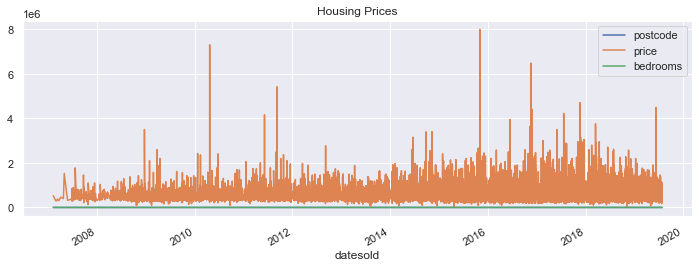

postcode        0
price           0
propertyType    0
bedrooms        0
dtype: int64

In [5]:
# Explore the data
# Plot the house prices as a time series.
# Plot the size.
data.plot(figsize=(12, 4))

# Specify the legend and title of the plot.
plt.legend(loc='best')
plt.title('Housing Prices')
plt.show(block=False);

# Check for missing values.
data.isna().sum()

3    11933
4    10442
2     3598
5     1950
1     1627
0       30
Name: bedrooms, dtype: int64


Text(0.5, 1.0, 'Count of number of bedrooms')

<AxesSubplot:title={'center':'Count of number of bedrooms'}, xlabel='bedrooms', ylabel='count'>

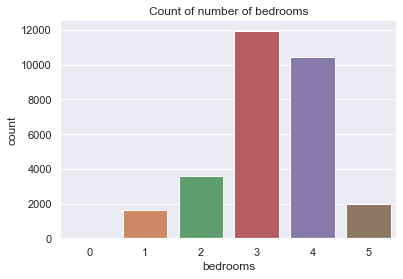

In [6]:
# Subset of the data
# Count the number of values in a specified column of the DataFrame.
print(data['bedrooms'].value_counts())

# Create a plot.
plt.title('Count of number of bedrooms')

sns.despine(left=True);
sns.countplot(x='bedrooms', data=data)

In [7]:
# Create a copy of the original data for convinience.
data_sub = data.copy()

# Create subsets of the data for separate graphs

# Data set consisting of houses with 1 bedroom: 
df_1 = data_sub[data_sub['bedrooms']==1]
print(df_1.shape)

# Data set consisting of houses with 2 bedrooms: 
df_2 = data_sub[data_sub['bedrooms']==2]
print(df_2.shape)

# Data set consisting of houses with 3 bedrooms: 
df_3 = data_sub[data_sub['bedrooms']==3]
print(df_3.shape)

# Data set consisting of houses with 4 bedrooms: 
df_4 = data_sub[data_sub['bedrooms']==4]
print(df_4.shape)

# Data set consisting of houses with 5 bedrooms: 
df_5 = data_sub[data_sub['bedrooms']==5]
print(df_5.shape)

(1627, 4)
(3598, 4)
(11933, 4)
(10442, 4)
(1950, 4)


(array([613., 982.,  27.,   2.,   1.,   0.,   1.,   0.,   0.,   1.]),
 array([  85000.,  304500.,  524000.,  743500.,  963000., 1182500.,
        1402000., 1621500., 1841000., 2060500., 2280000.]),
 <BarContainer object of 10 artists>)

(array([1.526e+03, 1.846e+03, 1.950e+02, 2.300e+01, 6.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 1.000e+00, 1.000e+00]),
 array([  96000.,  391400.,  686800.,  982200., 1277600., 1573000.,
        1868400., 2163800., 2459200., 2754600., 3050000.]),
 <BarContainer object of 10 artists>)

(array([1.0209e+04, 1.6280e+03, 8.4000e+01, 8.0000e+00, 1.0000e+00,
        0.0000e+00, 2.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00]),
 array([  69000.,  710100., 1351200., 1992300., 2633400., 3274500.,
        3915600., 4556700., 5197800., 5838900., 6480000.]),
 <BarContainer object of 10 artists>)

(array([8.528e+03, 1.767e+03, 1.260e+02, 1.600e+01, 1.000e+00, 2.000e+00,
        1.000e+00, 0.000e+00, 0.000e+00, 1.000e+00]),
 array([  56500.,  850850., 1645200., 2439550., 3233900., 4028250.,
        4822600., 5616950., 6411300., 7205650., 8000000.]),
 <BarContainer object of 10 artists>)

(array([1.289e+03, 5.590e+02, 7.400e+01, 1.700e+01, 7.000e+00, 1.000e+00,
        1.000e+00, 1.000e+00, 0.000e+00, 1.000e+00]),
 array([ 210000.,  919000., 1628000., 2337000., 3046000., 3755000.,
        4464000., 5173000., 5882000., 6591000., 7300000.]),
 <BarContainer object of 10 artists>)

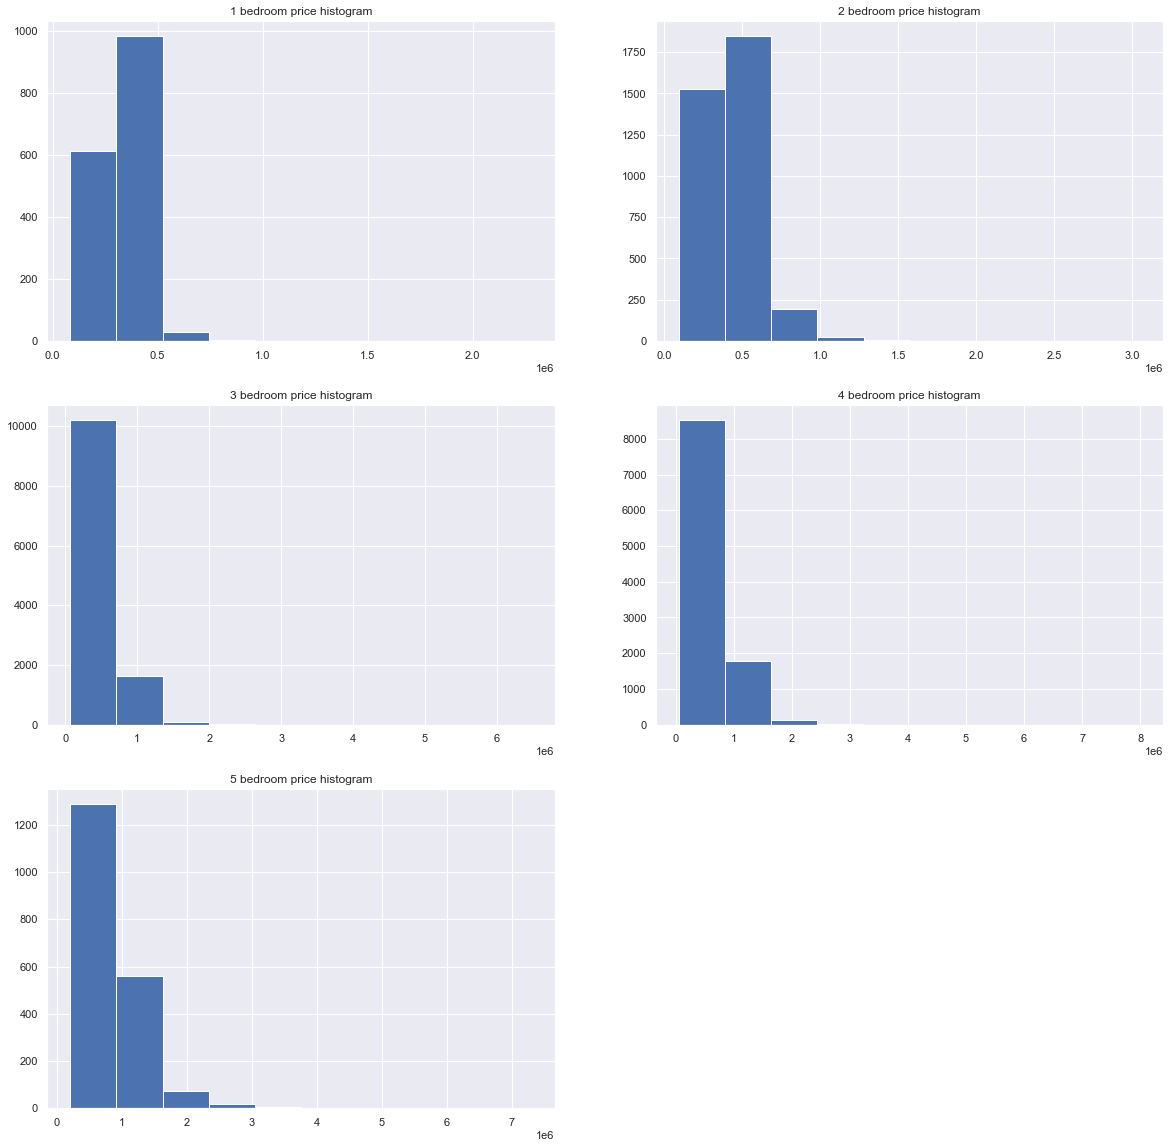

In [8]:
# Create plots and add titles

# Set the plot size (3 rows and 2 columns)
fig, axes = plt.subplots(nrows=3, ncols=2,figsize=(20,20))

# 1 bedroom:
axes[0][0].hist(df_1['price'])
axes[0][0].title.set_text('1 bedroom price histogram')

# 2 bedroom:
axes[0][1].hist(df_2['price'])
axes[0][1].title.set_text('2 bedroom price histogram')

# 3 bedroom:
axes[1][0].hist(df_3['price'])
axes[1][0].title.set_text('3 bedroom price histogram')

# 4 bedroom
axes[1][1].hist(df_4['price'])
axes[1][1].title.set_text('4 bedroom price histogram')

# 5 bedroom:
axes[2][0].hist(df_5['price'])
axes[2][0].title.set_text('5 bedroom price histogram')

fig.delaxes(axes[2][1])

plt.show()

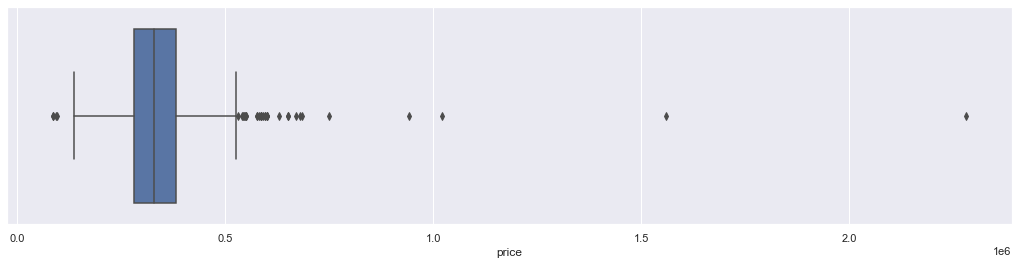

In [9]:
# Create a boxplot for 1 bedroom.
# Set figure size.
fig = plt.figure(figsize=(18, 4))

# Create a boxplot.
ax = sns.boxplot(x=df_1['price'], whis=1.5)

# Next we will remove the outliers

In [10]:
# create variable with a list of the columns where we want to remove the outliers
cols = ['price'] 

In [11]:
# Calculate quantiles and IQR.
# Same as np.percentile but maps (0,1) and not (0,100).

Q1 = df_1[cols].quantile(0.25)
print(Q1) # print the value to better understand the output

Q3 = df_1[cols].quantile(0.75)
print(Q3) # print the value to better understand the output

price    280000.0
Name: 0.25, dtype: float64
price    380250.0
Name: 0.75, dtype: float64


In [12]:
# Determine the interquartile range
IQR = Q3 - Q1
IQR # Print

price    100250.0
dtype: float64

In [13]:
# Return a Boolean array of the rows with (any) non-outlier column values.
# Identify smaller than and larger than and then invert to obtain only the values to retain
condition = ~((df_1[cols] < (Q1 - 1.5 * IQR)) | (df_1[cols] > (Q3 + 1.5 * IQR))).any(axis=1)
# ~ bitwise operator, or use np.invert(condition)

In [14]:
# Review the mask (what is included)
condition

datesold
2007-07-08     True
2007-10-15     True
2007-10-25     True
2007-11-29     True
2008-01-23     True
              ...  
2019-07-23     True
2019-07-24    False
2019-07-25     True
2019-07-25     True
2019-07-25     True
Length: 1627, dtype: bool

In [15]:
# Take a look at the inverted mask (original output prior to inverting above)
~condition

datesold
2007-07-08    False
2007-10-15    False
2007-10-25    False
2007-11-29    False
2008-01-23    False
              ...  
2019-07-23    False
2019-07-24     True
2019-07-25    False
2019-07-25    False
2019-07-25    False
Length: 1627, dtype: bool

In [16]:
# Filter our DataFrame based on condition. (Return only the values where the mask = True)
df_1_non_outlier = df_1[condition]
df_1_non_outlier.shape

(1592, 4)

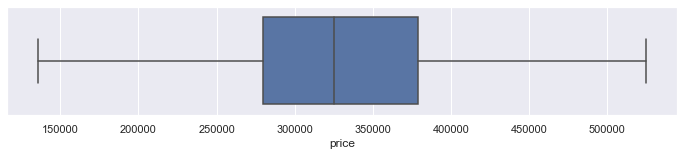

In [17]:
# Plot to see if outliers have been removed: 
# whis=multiplicative factor.
fig = plt.subplots(figsize=(12, 2))

ax = sns.boxplot(x=df_1_non_outlier['price'],whis=1.5)

### Other observations
- Teams
- Organisations
- Continious improvement
- Version control
- Data governance, data protection and data ethics
- Algorithms and algorithmic bias
- Making recommendations (including change management and effective delivery of your message)

#### Simple (Linear Regression)
- https://towardsdatascience.com/linear-regression-in-6-lines-of-python-5e1d0cd05b8d

In [18]:
#pip install scikit-learn
import numpy as np
import matplotlib.pyplot as plt  # To visualize
import pandas as pd  # To read data
from sklearn.linear_model import LinearRegression

In [19]:
data2 = pd.read_csv('data_d.csv')  # load data set
X = data2.iloc[:, 0].values.reshape(-1, 1)  # values converts it into a numpy array
Y = data2.iloc[:, 1].values.reshape(-1, 1)  # -1 means that calculate the dimension of rows, but have 1 column
linear_regressor = LinearRegression()  # create object for the class
linear_regressor.fit(X, Y)  # perform linear regression
Y_pred = linear_regressor.predict(X)  # make predictions

LinearRegression()

In [20]:
data2

,32.502345269453031,31.70700584656992
0,53.426804,68.777596
1,61.530358,62.562382
2,47.475640,71.546632
3,59.813208,87.230925
4,55.142188,78.211518
...,...,...
94,50.030174,81.536991
95,49.239765,72.111832
96,50.039576,85.232007
97,48.149859,66.224958


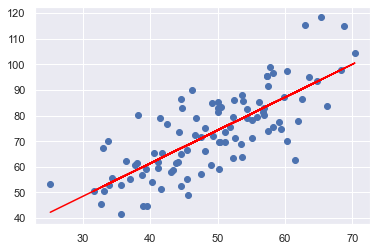

In [21]:
plt.scatter(X, Y)
plt.plot(X, Y_pred, color='red')
plt.show()

### Additional reading

#### Worthwhile to explore in more detail
- https://machinelearningmastery.com/implement-simple-linear-regression-scratch-python/
- https://machinelearningmastery.com/types-of-classification-in-machine-learning/
- https://machinelearningmastery.com/machine-learning-in-python-step-by-step/